In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import dotenv
import os
import json
import requests

In [58]:
dotenv.load_dotenv()
tmdb_key = os.getenv('TMDB_KEY_S')

In [ ]:
Authorization": "Bearer 

In [42]:
import tmdbsimple as tmdb #to label genres

In [ ]:
tmdb.API_KEY = tmdb_key

In [69]:
# genre obj
genre = tmdb.Genres()

#all available genres
genres_lst = genre.movie_list()

In [93]:
genre_dict ={}
for x in genres_lst['genres']:
    genre_dict[x['id']] = x['name']
genre_dict


{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [60]:
search = tmdb.Search()

In [94]:
s = search.movie(query='The Avengers')['results'][0]['genre_ids']

In [61]:
search.movie(query='The Avengers')

{'page': 1,
 'results': [{'adult': False,
   'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
   'genre_ids': [878, 28, 12],
   'id': 24428,
   'original_language': 'en',
   'original_title': 'The Avengers',
   'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
   'popularity': 36.8671,
   'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
   'release_date': '2012-04-25',
   'title': 'The Avengers',
   'video': False,
   'vote_average': 7.847,
   'vote_count': 33885},
  {'adult': False,
   'backdrop_path': '/1qLyqemN8UD0xbsXoJRFmimA23Y.jpg',
   'genre_ids': [28, 12, 53, 878, 35],
   'id': 9320,
   'original_language': 'en',
   'original_title': 'The Avengers',
   'overview': 'British Ministry agent John Steed, under direction

In [96]:
for x in s:
    print(genre_dict[x])

Science Fiction
Action
Adventure


In [63]:
tmdb_key_l = os.getenv('TMDB_KEY')

In [64]:
url = "https://api.themoviedb.org/3/search/movie?include_adult=false&language=en-US&page=1"

headers = {
    "accept": "application/json",
    "Authorization": f"Bearer {tmdb_key_l}"
}
params = {
    
}

response = requests.get(url, headers=headers)

print(response.text)

{"page":1,"results":[],"total_pages":1,"total_results":0}


In [7]:
df = pd.read_csv('ratings.csv')
df

,Date,Name,Year,Letterboxd URI,Rating
0,2021-01-12,Spider-Man: Into the Spider-Verse,2018,https://boxd.it/azpY,5.0
1,2021-01-12,Portrait of a Lady on Fire,2019,https://boxd.it/jkPq,5.0
2,2021-01-12,The Handmaiden,2016,https://boxd.it/948A,5.0
3,2022-07-01,Swiss Army Man,2016,https://boxd.it/bDG2,4.5
4,2022-07-07,Everything Everywhere All at Once,2022,https://boxd.it/jUk4,5.0
...,...,...,...,...,...
192,2025-10-28,Mufasa: The Lion King,2024,https://boxd.it/sE9C,2.0
193,2025-10-30,Vampyres,1974,https://boxd.it/1kmW,3.0
194,2025-11-05,Bugonia,2025,https://boxd.it/qeWY,3.5
195,2025-11-05,Chainsaw Man – The Movie: Reze Arc,2025,https://boxd.it/Kgyu,4.5


In [98]:
df2 = df[['Name', 'Year', 'Rating']]

In [99]:
df2

,Name,Year,Rating
0,Spider-Man: Into the Spider-Verse,2018,5.0
1,Portrait of a Lady on Fire,2019,5.0
2,The Handmaiden,2016,5.0
3,Swiss Army Man,2016,4.5
4,Everything Everywhere All at Once,2022,5.0
...,...,...,...
192,Mufasa: The Lion King,2024,2.0
193,Vampyres,1974,3.0
194,Bugonia,2025,3.5
195,Chainsaw Man – The Movie: Reze Arc,2025,4.5


In [100]:
#put the years into a decade range

df2['Year'] = df2['Year'].apply(lambda x: x // 10 * 10)

C:\Users\gumdr\AppData\Local\Temp\ipykernel_22104\3978808042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = df2['Year'].apply(lambda x: x // 10 * 10)


In [101]:
df2

,Name,Year,Rating
0,Spider-Man: Into the Spider-Verse,2010,5.0
1,Portrait of a Lady on Fire,2010,5.0
2,The Handmaiden,2010,5.0
3,Swiss Army Man,2010,4.5
4,Everything Everywhere All at Once,2020,5.0
...,...,...,...
192,Mufasa: The Lion King,2020,2.0
193,Vampyres,1970,3.0
194,Bugonia,2020,3.5
195,Chainsaw Man – The Movie: Reze Arc,2020,4.5


In [105]:
genres = []
for x in df2['Name']:
    genres.append(search.movie(query=x)['results'][0]['genre_ids'])
genres

[[16, 28, 12, 878],
 [18, 10749, 36],
 [53, 18, 10749],
 [35, 18, 10749, 14, 12],
 [28, 12, 878],
 [14, 35, 10402, 10749],
 [27, 53],
 [16, 14, 12, 18],
 [28, 18, 53],
 [27, 53],
 [16, 35, 14],
 [16, 10751, 28, 878, 12, 14, 35],
 [27],
 [10749, 18],
 [27, 9648, 878],
 [35, 18, 14],
 [18, 53, 9648],
 [18, 878],
 [10749, 35, 18],
 [18, 53],
 [27],
 [35],
 [35, 10749],
 [35],
 [35],
 [35, 18, 10749],
 [35, 18],
 [16, 35, 28, 878],
 [35],
 [35, 9648, 10749],
 [27, 53],
 [878, 28, 53],
 [35, 10749, 16, 14],
 [27, 18, 9648, 53],
 [27, 10749, 18],
 [35, 18],
 [12, 35, 16],
 [18, 35, 53],
 [28, 80, 53],
 [35],
 [37],
 [878, 12, 9648],
 [28, 12, 878, 53],
 [878, 28, 12, 53],
 [878, 12],
 [878],
 [10749, 878, 18],
 [18, 53, 27],
 [35, 10749],
 [27, 35, 10749],
 [35, 18],
 [878, 10749, 35],
 [12, 14, 28],
 [14, 35],
 [12, 14, 28],
 [53, 9648, 80],
 [878, 12, 18, 28],
 [18, 10749, 9648],
 [878, 12],
 [10749, 10751, 16, 14],
 [18],
 [80, 18, 9648],
 [27, 9648, 53],
 [18, 27],
 [18, 10751],
 [27, 96

In [ ]:
cat_genres = []
for x in genres:
    temp =[]
    for y in x:
        temp.append(genre_dict[y])
    cat_genres.append(temp)
#add genres to df2 
df2['genres'] = cat_genres

C:\Users\gumdr\AppData\Local\Temp\ipykernel_22104\3093866340.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['genres'] = cat_genres


In [114]:
df2

,Name,Year,Rating,genres
0,Spider-Man: Into the Spider-Verse,2010,5.0,"[Animation, Action, Adventure, Science Fiction]"
1,Portrait of a Lady on Fire,2010,5.0,"[Drama, Romance, History]"
2,The Handmaiden,2010,5.0,"[Thriller, Drama, Romance]"
3,Swiss Army Man,2010,4.5,"[Comedy, Drama, Romance, Fantasy, Adventure]"
4,Everything Everywhere All at Once,2020,5.0,"[Action, Adventure, Science Fiction]"
...,...,...,...,...
192,Mufasa: The Lion King,2020,2.0,"[Adventure, Family, Animation]"
193,Vampyres,1970,3.0,[Horror]
194,Bugonia,2020,3.5,"[Science Fiction, Crime, Thriller]"
195,Chainsaw Man – The Movie: Reze Arc,2020,4.5,"[Animation, Action, Romance, Fantasy]"


In [116]:
#liked column (yes or no)
liked_f = pd.read_csv('liked_films.csv')
df2['liked'] = 'no'


In [120]:
#create liked column
for x in liked_f['Name']:
    df2.loc[df2['Name'] == x, 'liked'] = 'yes'
df2.head()

,Name,Year,Rating,genres,liked
0,Spider-Man: Into the Spider-Verse,2010,5.0,"[Animation, Action, Adventure, Science Fiction]",yes
1,Portrait of a Lady on Fire,2010,5.0,"[Drama, Romance, History]",yes
2,The Handmaiden,2010,5.0,"[Thriller, Drama, Romance]",yes
3,Swiss Army Man,2010,4.5,"[Comedy, Drama, Romance, Fantasy, Adventure]",no
4,Everything Everywhere All at Once,2020,5.0,"[Action, Adventure, Science Fiction]",no


<Axes: xlabel='Rating', ylabel='Proportion'>

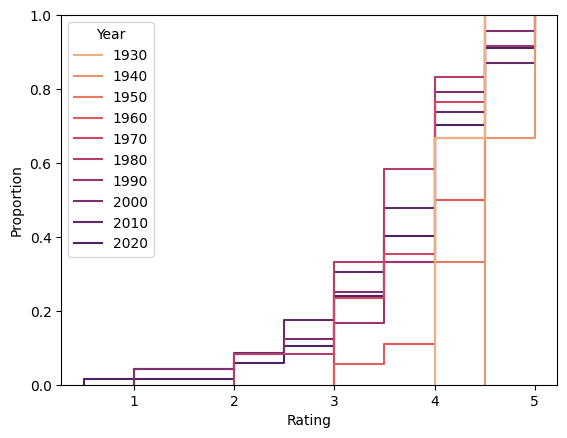

In [21]:
sns.ecdfplot(data=df2, x='Rating', hue='Year', palette='flare')

<Axes: xlabel='Rating', ylabel='Density'>

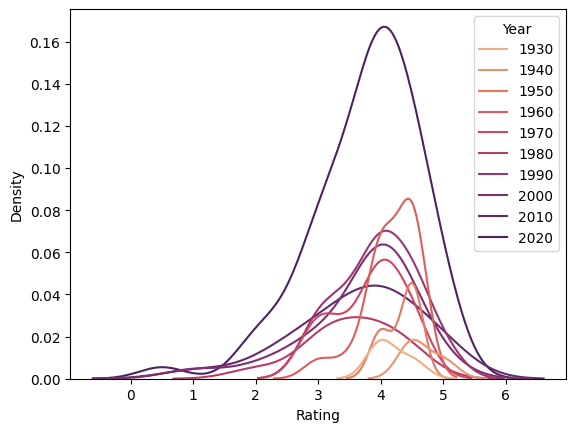

In [22]:
sns.kdeplot(data=df2, x='Rating', hue='Year', palette='flare')

In [35]:
df3 = df2[['Rating', 'Year']]
corr = df3.corr()
corr

,Rating,Year
Rating,1.000000,-0.185985
Year,-0.185985,1.000000


In [36]:
import requests

In [32]:
px.scatter(df2, x='Year', y='Rating', color='Year',trendline='ols')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Year=%{marker.color}<br>Rating=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': {'bdata': ('2gfaB9oH2gfkB7IH5AfkB4oH5AeKB+' ... 'fkB+QH5AfkB+QH5AeyB+QH5AfaBw=='),
                                   'dtype': 'i2'},
                         'coloraxis': 'coloraxis',
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('2gfaB9oH2gfkB7IH5AfkB4oH5AeKB+' ... 'fkB+QH5AfkB+QH5AeyB+QH5AfaBw=='),
                    'dtype': 'i2'},
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAAAAFEAAAAAAAAAUQAAAAAAAAB' ... 'AAAAxAAAAAAAAAEkAAAAAAAAAAQA=='),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': ('<b>OLS trendline</b><br>Rating' ... ' <b>(trend)</b><extra></extra>'),
              'legendgroup': '',
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scatter',
              'x': {'bdata': ('igeKB4oHlAeUB5QHngeeB54HngeeB5' ... 'fkB+QH5AfkB+QH5AfkB+QH5AfkBw=='),
                    'dtype': 'i2'},
              'xaxis': 'x',
              'y': {'bdata': ('HIxXqi7kEEAcjFeqLuQQQByMV6ou5B' ... 'mWew1A4HC4iZZ7DUDgcLiJlnsNQA=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Year'}},
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Year'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Rating'}}}
})